# Problem Summary

In the given problem we will try to predict the student given hours studied.  

We will first visualize the data in a graph.  

In [182]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [183]:
points = np.genfromtxt("data.csv", delimiter=",")

In [184]:
x_values = points[:, 0]
y_values = points[:, 1]

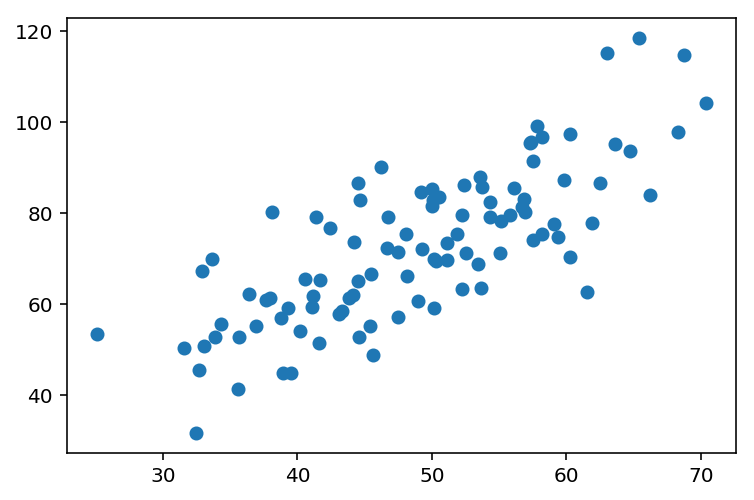

In [185]:
plt.scatter(x_values, y_values)
plt.show()

As we can see we can fit a straight line in the dataset.   
We will try to minimise a error function.  
![Error_Function](linear_regression_error.png)  

The above function is the Error function which will try to minimse.  
After we are done with minimising the values of __m__ and __b__ will be the trained variables.

Error is 2782.5537109375
Error is 65.94532012939453
Error is 57.6635856628418
Error is 57.66319274902344
Error is 57.66275405883789
Error is 57.662296295166016
Error is 57.6618766784668
Error is 57.661376953125
Error is 57.66096496582031
Error is 57.660526275634766
Error is 57.66007995605469
Error is 57.65971755981445


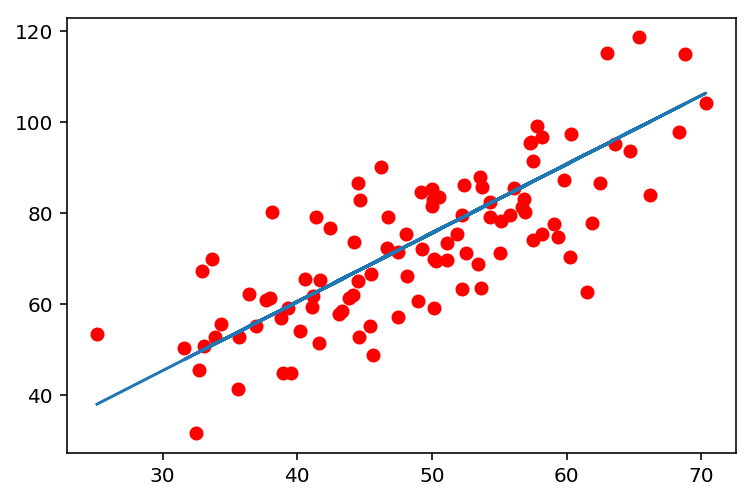

In [204]:
tf.reset_default_graph()

learning_rate = 0.001
epochs = 50
display_iteration = 5

m = tf.Variable(0.0, name='m')
b = tf.Variable(0.0, name='b')

X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

predicted_value = tf.add(tf.multiply(X, m), b)
cost = tf.reduce_sum(tf.square(predicted_value - Y)) / (2.0 * len(x_values))
tf.summary.scalar('cost', cost)
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter('./graphs', sess.graph)

with tf.Session() as sess:
    sess.run(init)
    feed_dict={X: x_values, Y: y_values}
    initial_error = sess.run(cost, feed_dict=feed_dict)
    print("Error is {0}".format(initial_error))
    for i in range(epochs):
        for (x, y ) in zip(x_values, y_values):
            sess.run(minimizer, feed_dict={X: x, Y: y})
        if i % display_iteration == 0:
            (error, s) = sess.run([cost, merged_summary], feed_dict=feed_dict)
            writer.add_summary(s, i)
            print("Error is {0}".format(error))
        
    final_error = sess.run(cost, feed_dict=feed_dict)
    print("Error is {0}".format(final_error))
    
    plt.plot(x_values, y_values, 'ro')
    plt.plot(x_values, sess.run(predicted_value, feed_dict={X: x_values}))

    plt.show()

writer.close()
    